In [1]:
### depending on which directory you run your notebook from
### you could locate pyroma package like this

#import sys
#sys.path.append('/path/to/your/directory/pyroma/')

In [2]:
import pyroma
roma = pyroma.ROMA()
roma

scROMA

In [3]:
import os
import zipfile
import io
import numpy as np
import pandas as pd
import scanpy as sc
import scipy.io
from glob import glob

In [4]:
print(os.getcwd())

/home/az/Downloads/pyroma_tutorial/pyroma-tutorial


In [5]:
datasets_dir = "datasets"

adata = sc.read_h5ad(os.path.join(datasets_dir, "rna_10xpmbc3k.h5ad"))
adata


AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'celltype'
    var: 'gene_ids'

### standard preprocessing

In [6]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

### run pyroma

In [7]:
import time

genesets_dir = "genesets"
roma.gmt =os.path.join(genesets_dir, "h.all.v2023.1.Hs.symbols.gmt")

roma.adata = adata
roma.pc_sign_mode = 'UseMeanExpressionAllWeights'
pathways_to_check = 'all' #['HALLMARK_NOTCH_SIGNALING', 'HALLMARK_PANCREAS_BETA_CELLS', 'HALLMARK_TGF_BETA_SIGNALING' ] 

iters = 5

start = time.time()
roma.compute(pathways_to_check, 
             parallel=True,
             loocv_on=True,
            iters=iters,
            )
end = time.time()

minutes, seconds = divmod(end - start, 60)
print(f"CPU Parallel {iters} iterations for shape {adata.shape}, running time (min): " + "{:0>2}:{:05.2f}".format(int(minutes),seconds))


Processing gene set: HALLMARK_NOTCH_SIGNALING | len of subsetlist:  25 
Processing gene set: HALLMARK_HEDGEHOG_SIGNALING | len of subsetlist:  17 
Processing gene set: HALLMARK_ANGIOGENESIS | len of subsetlist:  15 
Processing gene set: HALLMARK_PANCREAS_BETA_CELLS | len of subsetlist:  14 
Processing gene set: HALLMARK_WNT_BETA_CATENIN_SIGNALING | len of subsetlist:  33 
Processing gene set: HALLMARK_APICAL_SURFACE | len of subsetlist:  26 
Processing gene set: HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY | len of subsetlist:  47 
Processing gene set: HALLMARK_TGF_BETA_SIGNALING | len of subsetlist:  47 
Processing gene set: HALLMARK_MYC_TARGETS_V2 | len of subsetlist:  57 
Processing gene set: HALLMARK_CHOLESTEROL_HOMEOSTASIS | len of subsetlist:  61 
Processing gene set: HALLMARK_IL6_JAK_STAT3_SIGNALING | len of subsetlist:  71 
Processing gene set: HALLMARK_PROTEIN_SECRETION | len of subsetlist:  88 
Processing gene set: HALLMARK_INTERFERON_ALPHA_RESPONSE | len of subsetlist:  93 
Proc

In [8]:
roma

scROMA: module activities are computed

In [9]:
roma.adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'celltype', 'n_genes'
    var: 'gene_ids', 'n_cells'
    uns: 'log1p', 'ROMA', 'ROMA_stats', 'ROMA_active_modules'

### all the pyroma statistics

In [10]:
roma.adata.uns['ROMA_stats']

,L1,ppv L1,Median Exp,ppv Med Exp,q L1,q Med Exp
HALLMARK_NOTCH_SIGNALING,0.308422,0.6,-0.046337,0.500000,0.937500,0.925926
HALLMARK_HEDGEHOG_SIGNALING,0.436227,0.6,-0.043306,0.500000,0.937500,0.925926
HALLMARK_ANGIOGENESIS,0.682129,0.0,-0.092545,0.333333,0.000000,0.925926
HALLMARK_PANCREAS_BETA_CELLS,0.329636,0.6,-0.002735,1.000000,0.937500,1.000000
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.168701,1.0,0.027317,0.500000,1.000000,0.925926
HALLMARK_APICAL_SURFACE,0.273708,0.6,0.015345,0.833333,0.937500,1.000000
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY,0.295123,0.2,0.010931,0.666667,0.833333,0.980392
HALLMARK_TGF_BETA_SIGNALING,0.234388,0.2,-0.024408,0.500000,0.833333,0.925926
HALLMARK_MYC_TARGETS_V2,0.190350,0.6,0.193095,0.166667,0.937500,0.925926
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.223410,0.4,-0.100565,0.166667,0.833333,0.925926


### active pathways

In [11]:
roma.adata.uns['ROMA_active_modules'].sort_values(by='Median Exp')

,L1,ppv L1,Median Exp,ppv Med Exp,q L1,q Med Exp
HALLMARK_ANGIOGENESIS,0.682129,0.0,-0.092545,0.333333,0.0,0.925926
HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION,0.268412,0.0,-0.062662,0.500000,0.0,0.925926
HALLMARK_ALLOGRAFT_REJECTION,0.212134,0.0,-0.025685,1.000000,0.0,1.000000


### visualize results

In [12]:
sc.pp.pca(roma.adata)
sc.pp.neighbors(roma.adata)
sc.tl.umap(roma.adata)

In [13]:
adata.obs

,celltype,n_genes
AAACATACAACCAC-1,CD4 T,781
AAACATTGAGCTAC-1,B,1352
AAACATTGATCAGC-1,CD4 T,1131
AAACCGTGCTTCCG-1,CD14 Monocytes,960
AAACCGTGTATGCG-1,NK,522
...,...,...
TTTCGAACTCTCAT-1,CD14 Monocytes,1155
TTTCTACTGAGGCA-1,B,1227
TTTCTACTTCCTCG-1,B,622
TTTGCATGAGAGGC-1,B,454


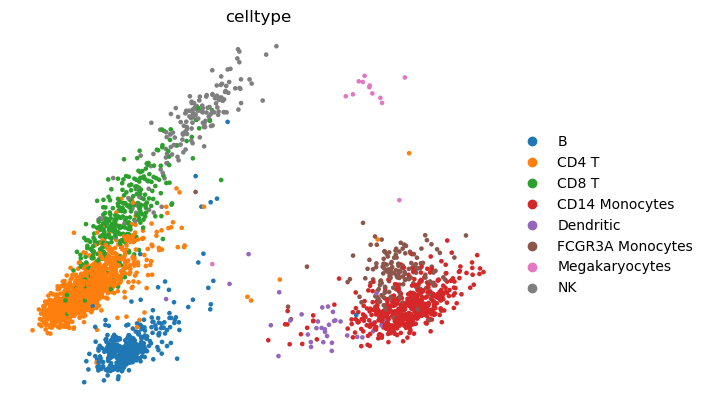

In [14]:
sc.pl.pca(adata, color=['celltype',
                                ],
                                frameon=False,
                                ncols=2,
                                wspace=0.4)

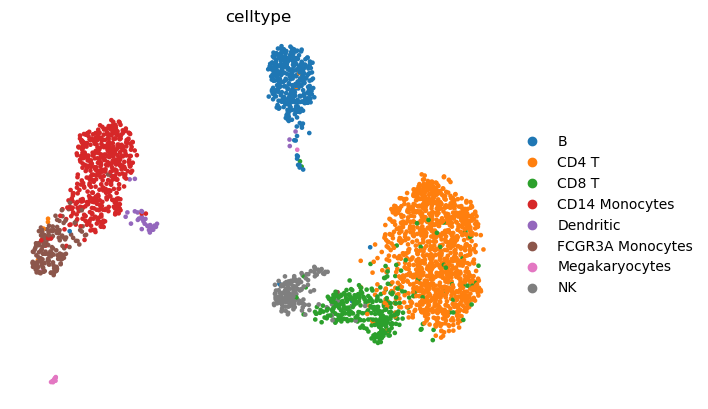

In [15]:
sc.pl.umap(adata, color=['celltype',
                                ],
                                frameon=False,
                                ncols=2,
                                wspace=0.4)

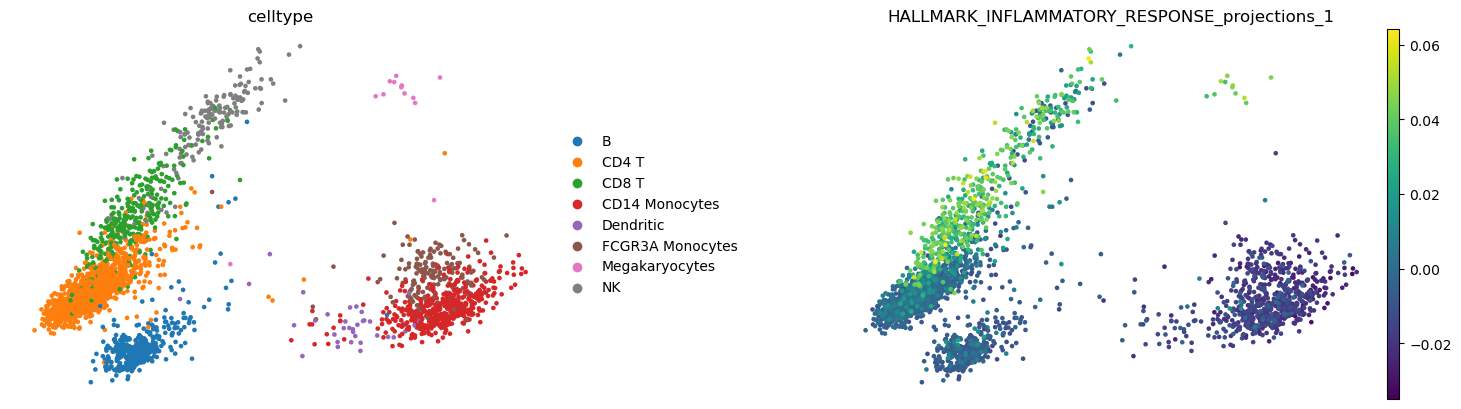

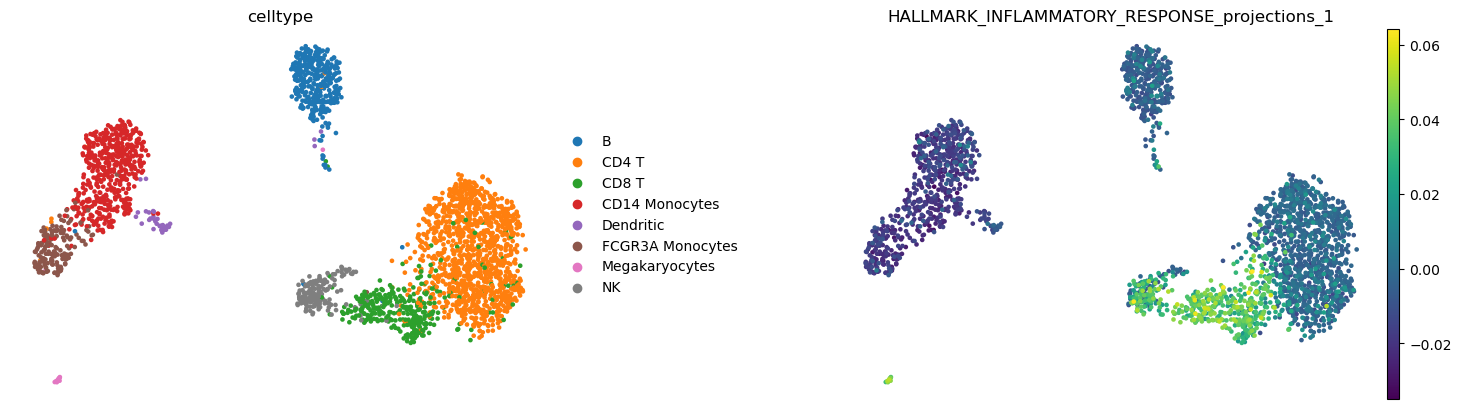

In [16]:
geneset_name = 'HALLMARK_INFLAMMATORY_RESPONSE'

roma.adata.obs[f'{geneset_name}_projections_1'] = roma.adata.uns['ROMA'][f'{geneset_name}'].svd.components_[0]
roma.adata.obs[f'{geneset_name}_projections_1_reverse'] = -1 * roma.adata.uns['ROMA'][f'{geneset_name}'].svd.components_[0]

GeneScores = pd.DataFrame(roma.adata.uns['ROMA'][f'{geneset_name}'].projections_1,
                index=roma.adata.uns['ROMA'][f'{geneset_name}'].subsetlist,
                columns=[f'{geneset_name}'])

sc.pl.pca(adata, color=['celltype',
                                f'{geneset_name}_projections_1'],
                                frameon=False,
                                ncols=2,
                                wspace=0.4)

sc.pl.umap(adata, color=['celltype',
                                f'{geneset_name}_projections_1'],
                                frameon=False,
                                ncols=2,
                                wspace=0.4)

In [17]:
GeneScores

,HALLMARK_INFLAMMATORY_RESPONSE
CXCL10,-0.170385
CCL2,-0.171731
CCL5,45.371910
FPR1,-3.666130
CCL20,0.093308
...,...
STAB1,-0.306735
IRF1,1.356808
ICAM4,-0.329900
P2RX4,-0.153761


In [18]:
# optional: to load pathway-genes dictionary 
genesets = roma.read_gmt_to_dict(roma.gmt)


### save and load results

In [19]:
save_dir = 'results'

roma.save_active_modules_results(path=save_dir)   

In [20]:
del roma.adata

In [21]:
#roma.adata

In [22]:
load_dir = 'results'

roma.load_active_modules_results(path=save_dir)   

In [23]:
roma.adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'celltype', 'n_genes', 'HALLMARK_INFLAMMATORY_RESPONSE_projections_1', 'HALLMARK_INFLAMMATORY_RESPONSE_projections_1_reverse'
    var: 'gene_ids', 'n_cells'
    uns: 'ROMA_active_modules', 'ROMA_stats', 'celltype_colors', 'log1p', 'neighbors', 'pca', 'umap', 'ROMA'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'